<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      2000 non-null   object
 1   v2      2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


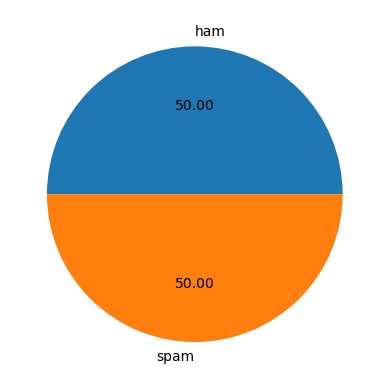

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thotaeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


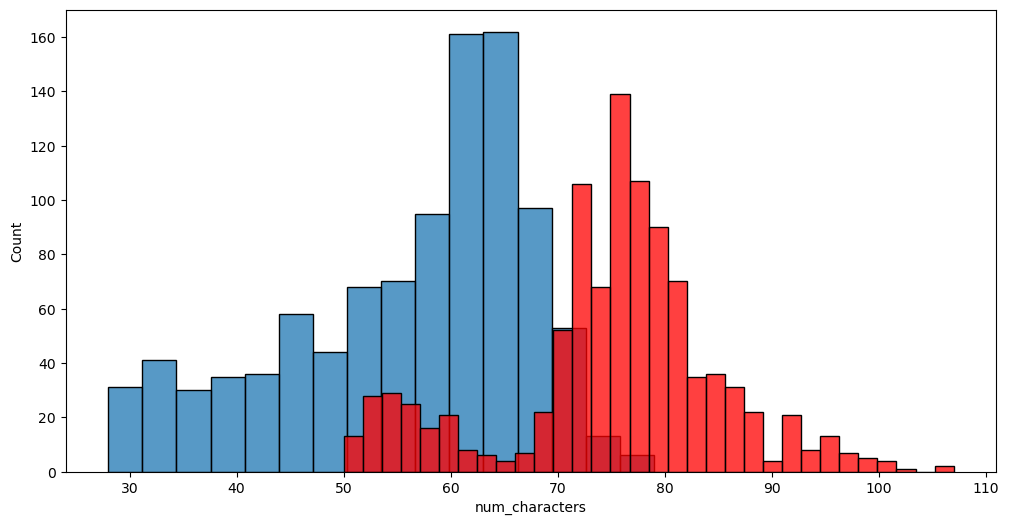

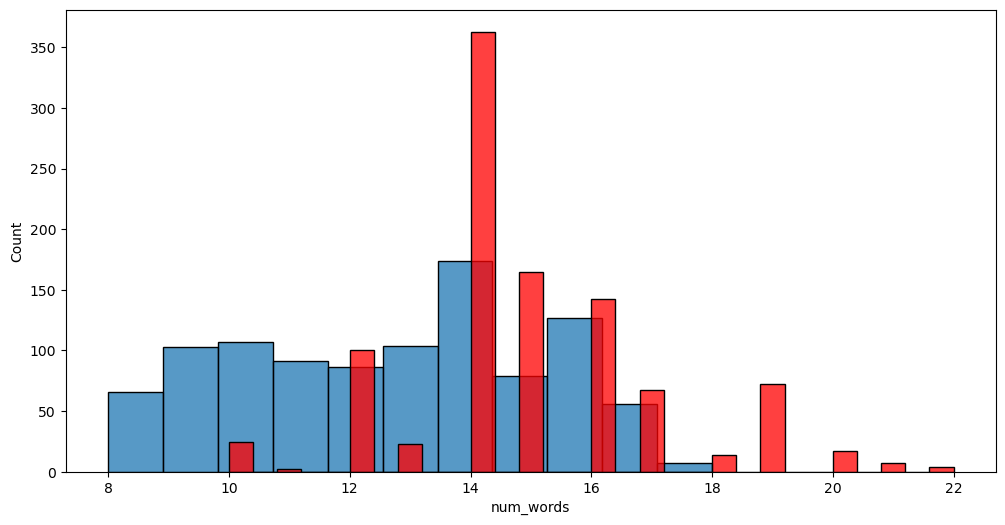

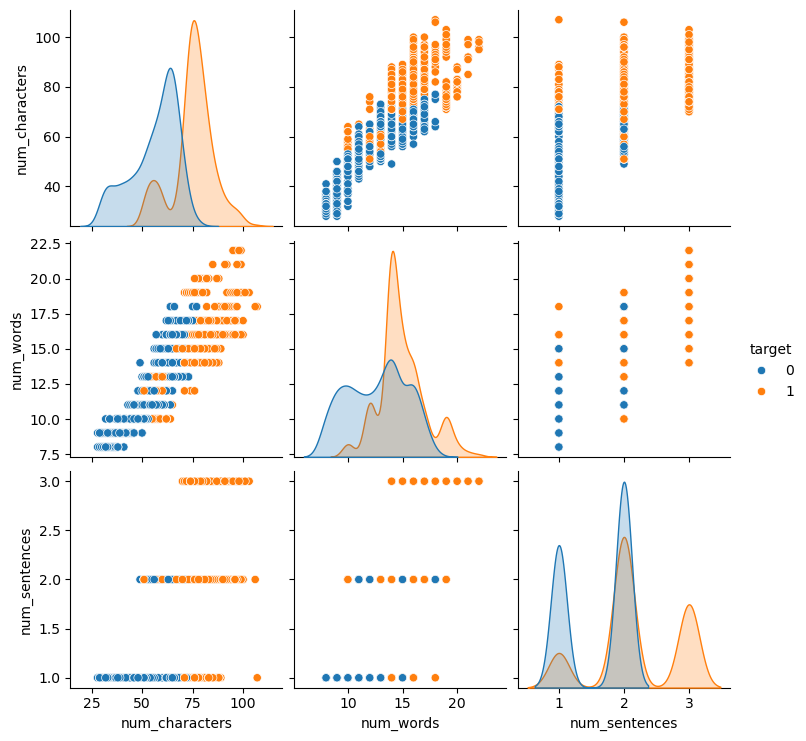

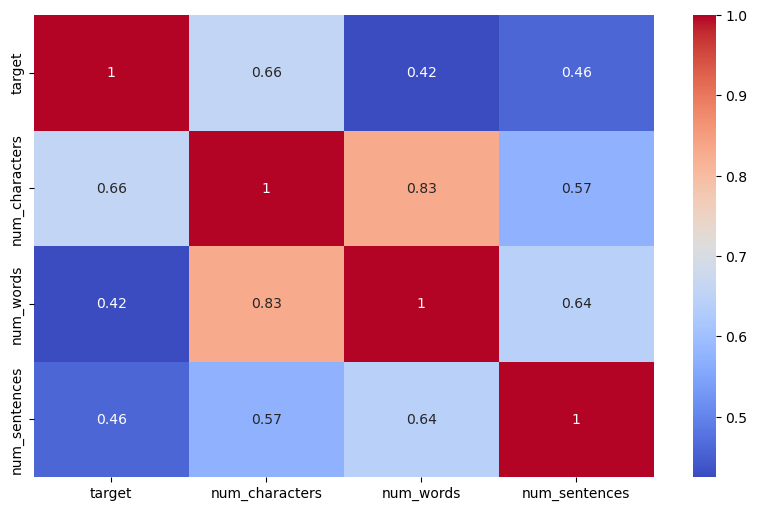

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thotaeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thotaeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


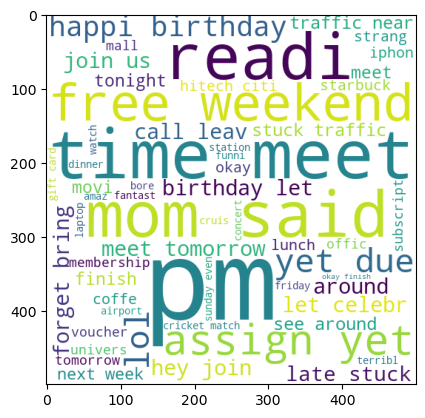

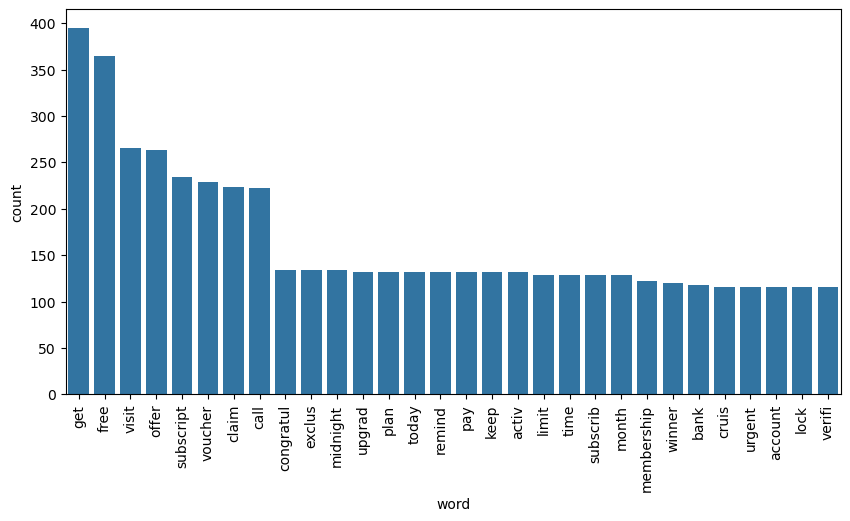

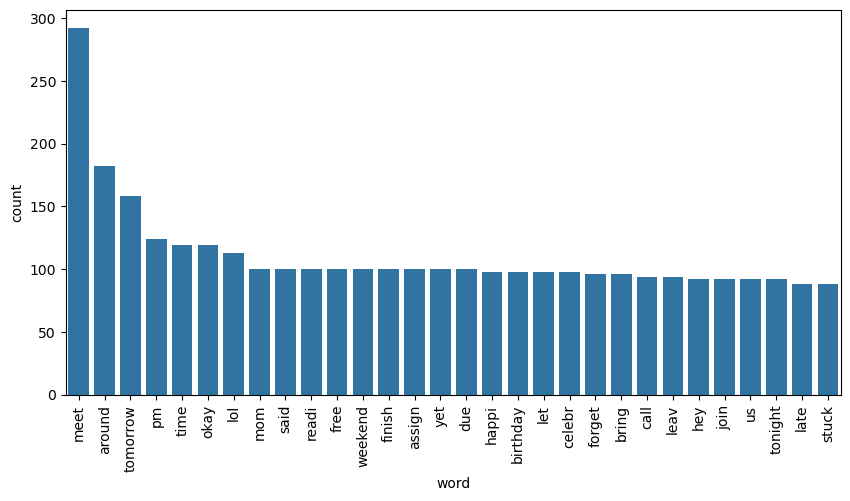

accuracy_score: 1.0
confusion_matri: [[196   0]
 [  0 204]]
precision_score: 1.0


In [60]:
import numpy as np
import pandas as pd 


df = pd.read_csv("C:\\excelr ds\\spam_ham_unique_dataset.csv")
df.head()

# Data cleaning


df.info()

# # droping last three columns because missing values or more than 40%
# df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# df

# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

# missing values
df.isnull().sum()


# checking for dupliactes values
df.duplicated().sum()

# # remove duplicates
# df=df.drop_duplicates(keep='first')


df.duplicated().sum()

# feature ennigerring
from sklearn.preprocessing import LabelEncoder
en=Label=LabelEncoder()
df['target']=en.fit_transform(df['target'])
df.head()


# EDA 

# checking wheather the y variable balanced or imbalanced
df['target'].value_counts()

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is balanced 

! pip install nltk

import nltk
nltk.download('punkt')

df['num_characters']=df['text'].apply(len)
df.head()

# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

# num of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

df[['num_characters','num_words','num_sentences']].describe()

import seaborn as sns 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters']) #spam
sns.histplot(df[df['target']==1]['num_characters'],color='red')# ham

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) #spam
sns.histplot(df[df['target']==1]['num_words'],color='red')# ham

sns.pairplot(df,hue='target')

# checking corealtion

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



# Data Preprocessing 
# Lower case 
# tokenize
# Removing special chars
# removing stop words
# stemming

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps=PorterStemmer()
def transform_text(text):
    # Lowercase
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # Remove stopwords and punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Apply to DataFrame
df['transform_text'] = df['text'].apply(transform_text)



df.head()

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


spam_wc=wc.generate(df[df['target'] ==1]['transform_text'].str.cat(sep=" "))


plt.imshow(spam_wc)


ham_wc=wc.generate(df[df['target'] ==0]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)



# how many words in spam
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)        

# most repeted values barplot for spam
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of top 30 most common words
common_df = pd.DataFrame(Counter(spam_corpus).most_common(30),
                         columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation=90)
plt.show()


# how many words in spam
ham_corpus=[]
for msg in df[df['target'] ==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

# most repeted values barplot for ham
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of top 30 most common words
common_df = pd.DataFrame(Counter(ham_corpus).most_common(30),
                         columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation=90)
plt.show()


# Model Buildling

# Text vectorzition
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['transform_text']).toarray()

X.shape

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


y=df['target']

# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)


# model AA

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


mnb=MultinomialNB()



mnb=MultinomialNB()
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred2))
print("confusion_matri:",confusion_matrix(y_test,y_pred2))
print("precision_score:",precision_score(y_test,y_pred2))









In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
